In [ ]:
%pip install segment-geospatial

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 9.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.3/513.3 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 7.2 

In [ ]:
import os
import leafmap
from samgeo import SamGeo, show_image, download_file, overlay_images, tms_to_geotiff

In [ ]:
m = leafmap.Map(center=[12.9716, 77.5946], zoom=17, height="800px")
m.add_basemap("SATELLITE")
m

Map(center=[12.9716, 77.5946], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [ ]:
if m.user_roi_bounds() is not None:
    bbox = m.user_roi_bounds()
else:
    bbox = [-122.2659, 37.8682, -122.2521, 37.8741]

In [ ]:
image = "satellite.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=17, source="Satellite", overwrite=True)

Downloaded image 01/24
Downloaded image 02/24
Downloaded image 03/24
Downloaded image 04/24
Downloaded image 05/24
Downloaded image 06/24
Downloaded image 07/24
Downloaded image 08/24
Downloaded image 09/24
Downloaded image 10/24
Downloaded image 11/24
Downloaded image 12/24
Downloaded image 13/24
Downloaded image 14/24
Downloaded image 15/24
Downloaded image 16/24
Downloaded image 17/24
Downloaded image 18/24
Downloaded image 19/24
Downloaded image 20/24
Downloaded image 21/24
Downloaded image 22/24
Downloaded image 23/24
Downloaded image 24/24
Saving GeoTIFF. Please wait...
Image saved to satellite.tif


In [ ]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")
m

Map(bottom=15558113.0, center=[37.87115, -122.259], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [ ]:
sam = SamGeo(
    model_type="vit_h",
    sam_kwargs=None,
)

Model checkpoint for vit_h not found.


Downloading...
From: https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
To: /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.56G/2.56G [00:26<00:00, 97.4MB/s]


In [ ]:
sam.generate(image, output="masks.tif", foreground=True, unique=True)

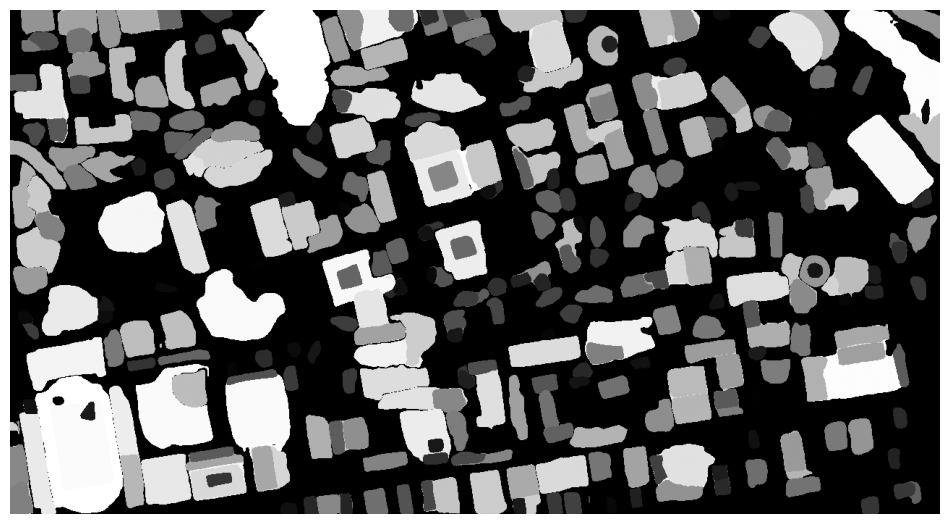

In [ ]:
sam.show_masks(cmap="binary_r")

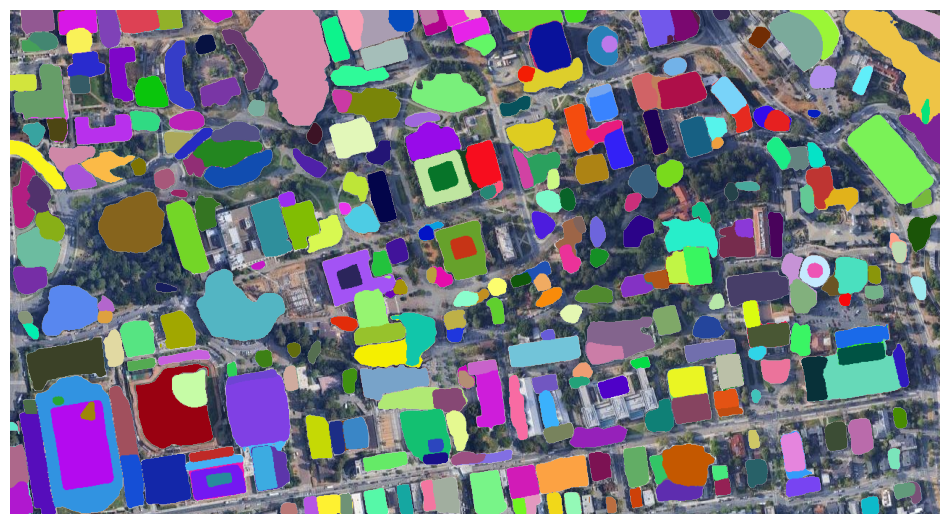

In [ ]:
sam.show_anns(axis="off", alpha=1, output="annotations.tif")


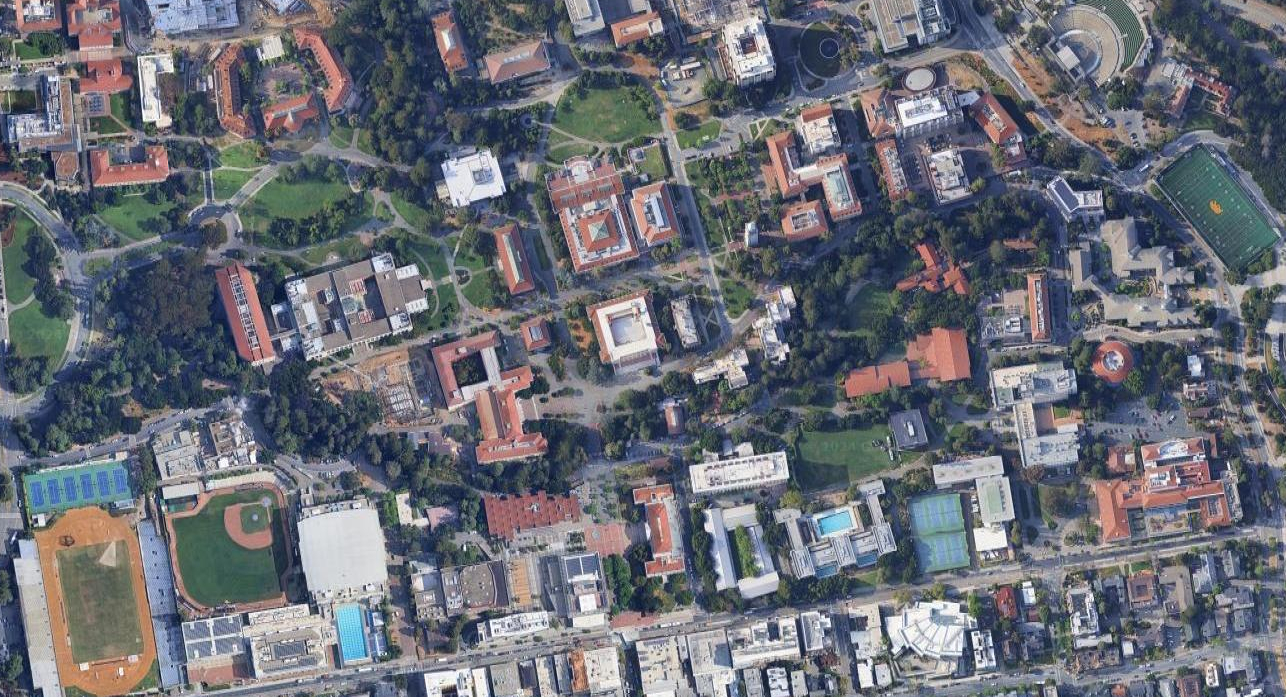
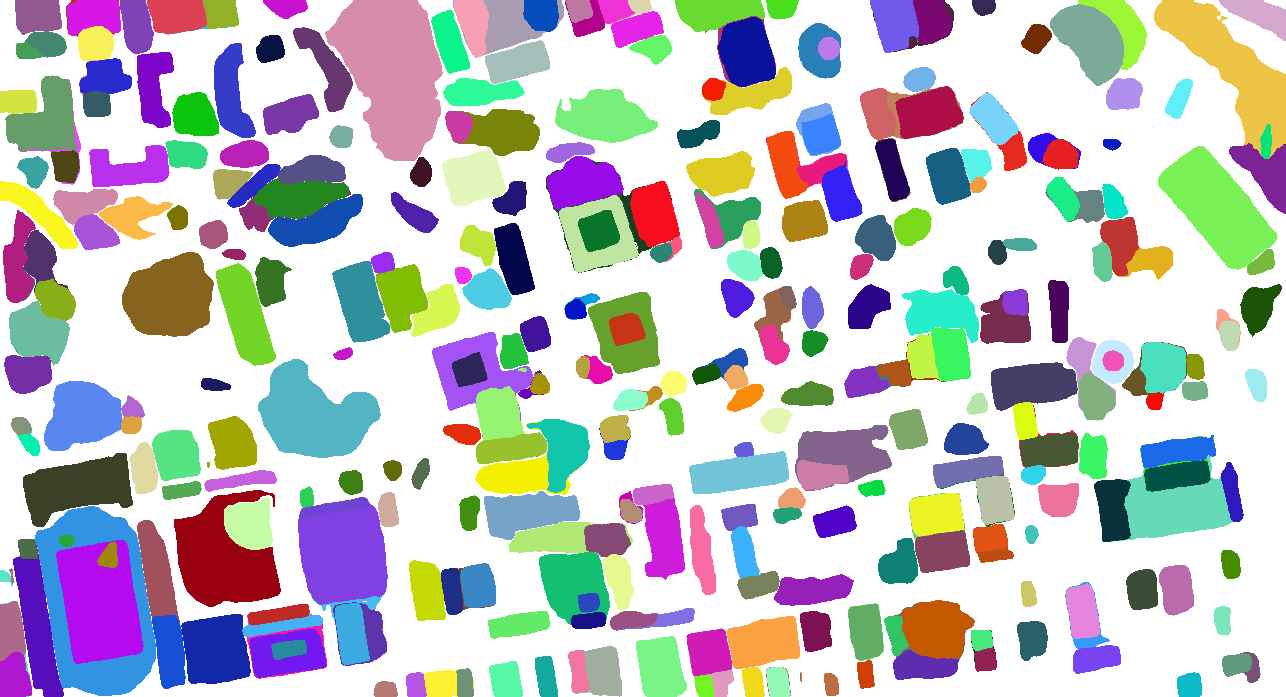

In [ ]:
leafmap.image_comparison(
    "satellite.tif",
    "annotations.tif",
    label1="Satellite Image",
    label2="Image Segmentation",
)

In [ ]:
m.add_raster("annotations.tif", alpha=0.5, layer_name="Masks")
m

Map(bottom=3239933.0, center=[37.87115, -122.259], controls=(ZoomControl(options=['position', 'zoom_in_text', …

In [ ]:
sam.tiff_to_vector("masks.tif", "masks.gpkg")

In [ ]:
sam_kwargs = {
    "points_per_side": 32,
    "pred_iou_thresh": 0.86,
    "stability_score_thresh": 0.92,
    "crop_n_layers": 1,
    "crop_n_points_downscale_factor": 2,
    "min_mask_region_area": 100,
}

sam = SamGeo(
    model_type="vit_h",
    sam_kwargs=sam_kwargs,
)

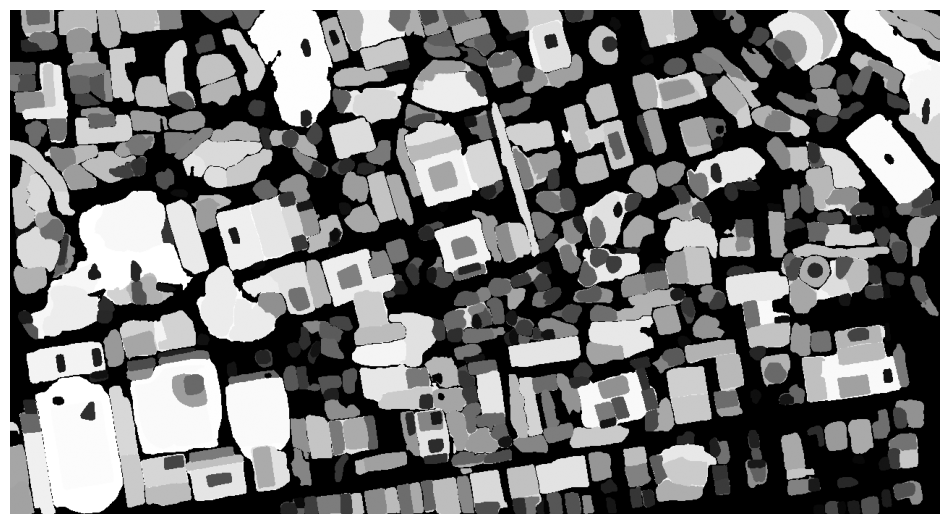

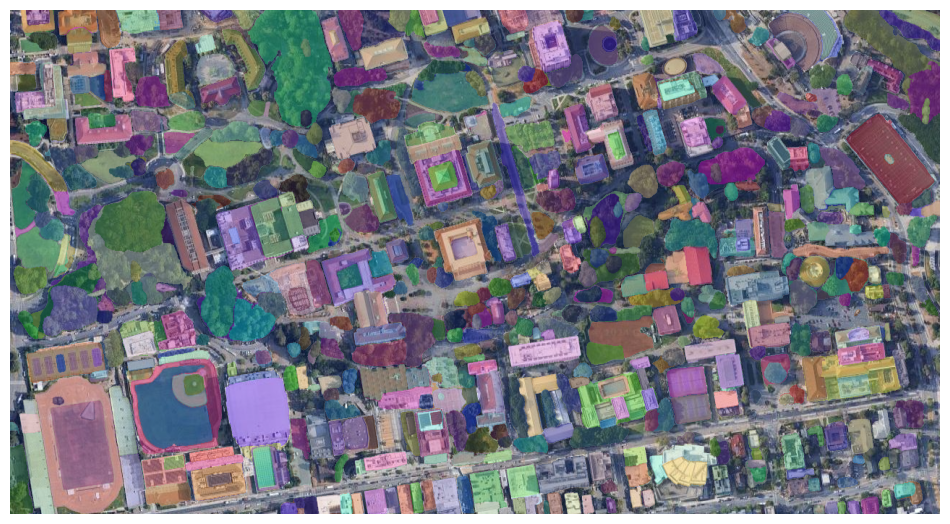

In [ ]:
sam.generate(image, output="masks2.tif", foreground=True)
sam.show_masks(cmap="binary_r")
sam.show_anns(axis="off", opacity=1, output="annotations2.tif")


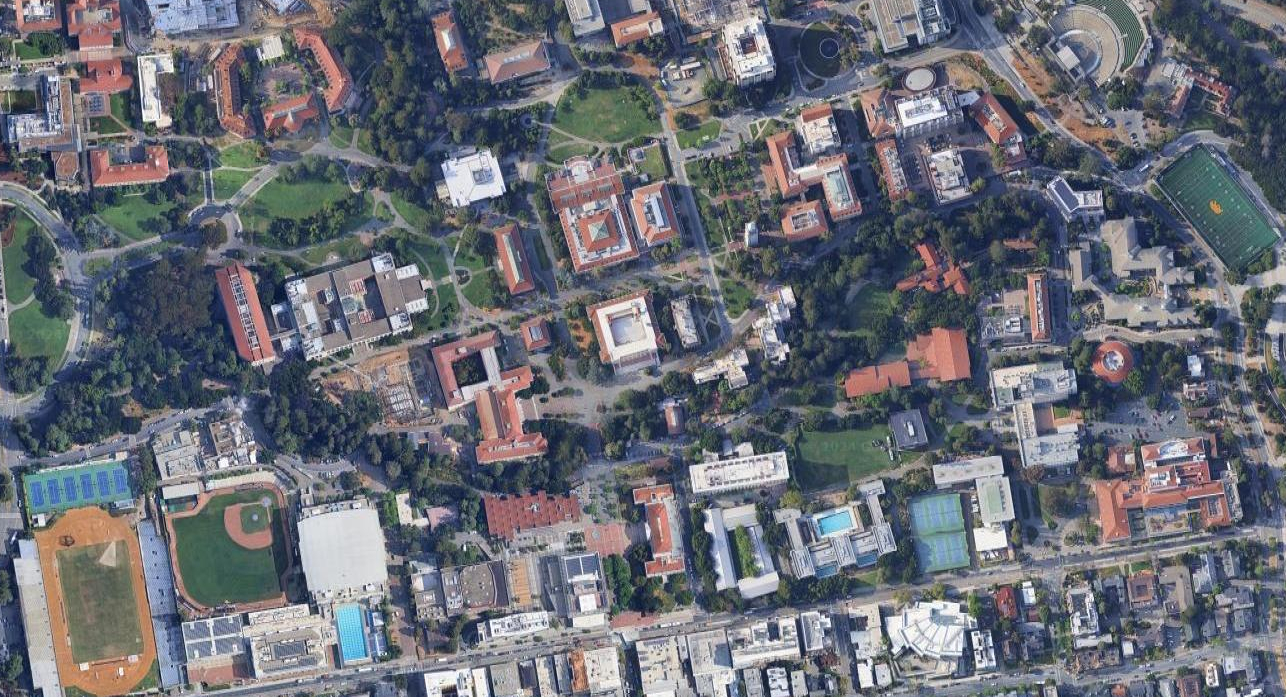
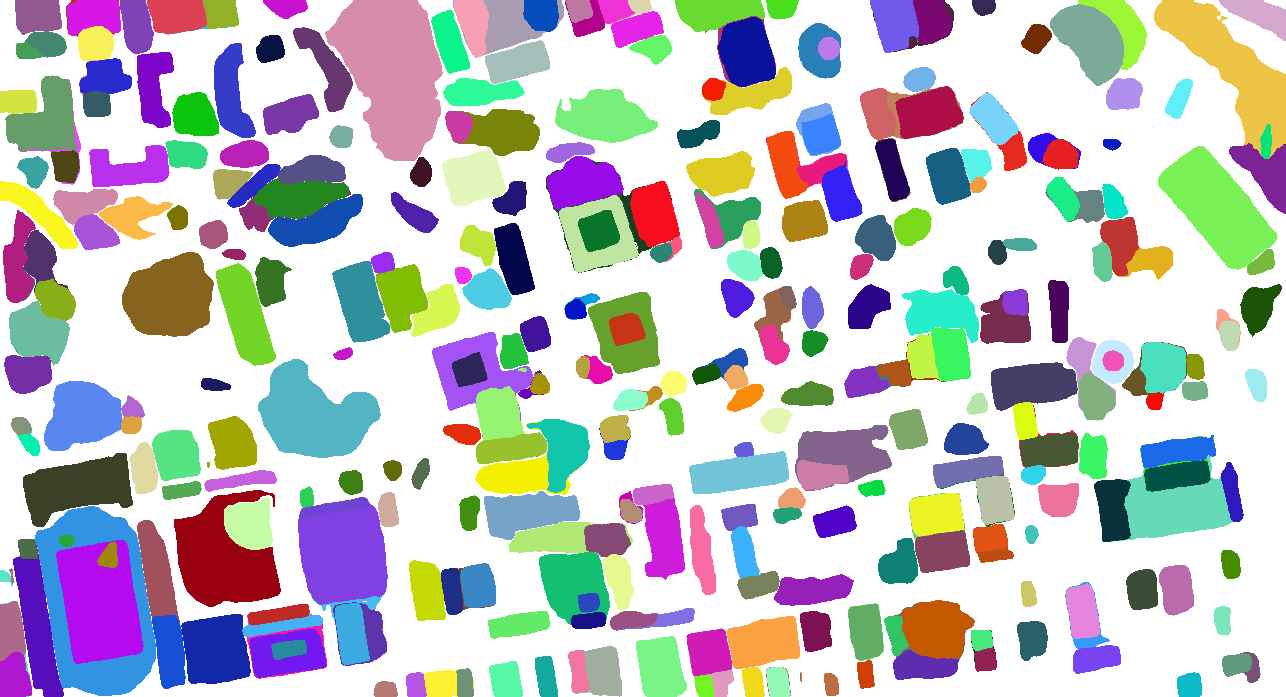

In [ ]:
leafmap.image_comparison(
    image,
    "annotations.tif",
    label1="Image",
    label2="Image Segmentation",
)

In [ ]:
overlay_images(image, "annotations2.tif", backend="TkAgg")

The TkAgg backend is not supported in Google Colab. The overlay_images function will not work on Colab.
